# Задание
https://docs.google.com/document/d/1snU4dXicuPmFz9XjTF8c7nSw0qGdJAgdJeZVrg-NakI/edit

## Продвинутое машинное обучение: ДЗ 1

Первое ДЗ состоит из двух частей: первая часть про теорему Байеса и общие вероятностные рассуждения, вторая часть — про линейную регрессию. В качестве решения ожидается ссылка на jupyter-ноутбук на вашем github (или публичный, или с доступом для пользователя snikolenko). Решение обязательно нужно сдать на портале Академии.

## Часть I: О теореме Байеса

Первая часть состоит из двух вопросов и одного задания. Смысл её в том, чтобы провести вероятностные рассуждения в ситуациях, когда модель сама по себе очень простая, но её ещё надо правильно построить, правильно отобразить жизненную ситуацию. Поэтому на первые два вопроса рекомендую давать развёрнутые ответы; эти ответы лучше писать прямо в ноутбуке, LaTeX в jupyter работает на вполне достаточном для нас уровне.

1. Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови! Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

2. Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить.

3. Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%. Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного). Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?

### Ответы

#### 1 - 2
Введём следующие обозначения:
$s$ - группа крови: $s = 1$ - человек обладает редкой группой крови, $s = 0$ - человек не обладает редкой группой крови,
$d$ - является ли человек убийцей: $d = 1$ - этот человек убийца, $d = 0$ - этот человек не убийца.
Тогда $p(s=1|d=1)$ - вероятность того, что если этот человек убийца, то у него эта редкая группа крови, $p(d=1|s=1)$ - вероятность того, что если у человека редкая группа крови, то он убийца. Исходя из условий задачи, $p(s=1) = 1\%$.

Чтобы ответить на вопрос, с какой вероятностью подсудимый является виновным, нужно оценить вероятность $p(d=1|s=1)$.

##### 1
Теперь обсудим ответ прокурора. В своей первой фразе

> Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; 

прокурор говорит о вероятности $p(s=1|d=0)$, но приводит оценку для $p(s=1)=1\%$. Во второй фразе он делает вывод:

> с вероятностью 99% он виновен, предлагаю осудить.

Здесь подразумевается вероятность виновности подозреваемого при наличии редкой группы крови: $p(d=1|s=1)$ (искомая вероятность), но приводится вероятность для случайного человека не обладать этой редкой группой крови $p(s=0)=99\%$. 

##### 2
Теперь обсудим слова адвоката. В первой фразе он приводит оценку для количества человек, которые живут в городе и при этом обладают этой редкой группой крови: $p(s=1)=1\%$ 
> В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. 

Здесь всё верно (10_000 человек - это 1% от 1_000_000). В своей второй фразе адвокат говорит:
> Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. 

Здесь адвокат приводит оценку для некоторой вероятности в $0.01\%$. Как я понял, эта оценка получена оценкой вероятности того, что если человек обладает редкой группой крови, то он убийца (т.е. просто какой-то выделенный 1 человек из этой группы в 10_000 человек) $p(d=1|s=1) = 0.01\%$. То есть адвокат приводит здесь оценку для той самой искомой вероятности. И в третьей фразе адвокат наносит "сокрушительный" удар по стороне обвинения:
> Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела.

Здесь адвокат предлагает полностью исключить из рассмотрения дела тот факт, что у подсудимого та же редкая группа крови, что и была найдена на месте преступления. Но этого делать нельзя: если её исключить, то, при отсутствии других свидетельств, нужно будет оценивать вероятность $p(d=1) = 10^{-6}$ (вероятность того, что произвольный человек из 1_000_000 жителей города является убийцей), которая на 2 порядка ниже, чем вероятность, учитывающая, что $p(d=1|s=1) = 10^{-4}$. Видно, что вероятность, о которой говорит адвокат $p(d=1)$, будет меньше искомой $p(d=1|s=1)$, что говорит о том, что адвокат пытается заставить суд учитывать меньше доказательств, тем самым отведя подозрения от своего подзащитного, снизив вероятность того, что преступление совершил именно он. В этом смысле он делает свою работу, защищая клиента. 

#### 3

Введём обозначения длля задачи. Пусть $s$ означает, болеет ли человек: если $s=1$, то болеет, если $s=0$, то здоров; $d$ ответственна за результат теста: при $d=1$ тест положительный, при $d=0$ -- отрицательный. Обозначии ошибку False Positive как $$p(d=1|s=0) = \beta,$$ а False Negative как $$p(d=0|s=1)=\alpha.$$ Также обозначим искомые апостериорные вероятности болезни после положительного и отрицательного тестов как $$p(s=1|d=1)=F, \qquad p(s=1|d=0)=G.$$ По условиям задачи, эпидемиологическая обстановка не изменилась, т.е. $p(s=1)=0.01$ и $p(s=0) = 0.99$.

Запишем ещё пару условий. Сумма условных вероятностей при положительном тесте человеку быть здоровым или больным равна 1: $p(s=1|d=1) + p(s=0|d=1) = 1$, т.е. $p(s=0|d=1) = 1 - F$. Аналогично для случая отрицательного теста: $p(s=1|d=0) + p(s=0|d=0) = 1$, т.е. $p(s=0|d=0) = 1 - G$. То же самое можно записать и для фиксированного состояние человека при различных исходах теста: человек будет либо здоровым, либо больным как при положительном, так и при отрицательном исходах теста: $p(d=1|s=1) = 1 - \alpha$, $p(d=0|s=0) = 1 - \beta$. 

Опустив выкладки, получим, что выражения для зависимостей $F$ и $G$ от $\alpha$ и $\beta$ запишутся в следующем виде:
$$F = \frac{(1-\alpha) \cdot p(s=1)}{(1-\alpha) \cdot p(s=1) + \beta \cdot p(s=0)},$$
$$G = \frac{\alpha \cdot p(s=1)}{(1-\beta) \cdot p(s=0) + \alpha \cdot p(s=1)}.$$

In [1]:
from datetime import datetime, timedelta

from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import scipy as sp
import scipy.integrate as integrate
import scipy.stats as st

In [2]:
PS_1 = 0.01
PS_0 = 0.99

def func_F(alpha=0.05, beta=0.05):
    numer = (1 - alpha) * PS_1
    denom = (1 - alpha) * PS_1 + beta * PS_0
    return numer / denom

def func_G(alpha=0.05, beta=0.05):
    numer = alpha * PS_1
    denom = (1 - beta) * PS_0 + alpha * PS_1
    return numer / denom

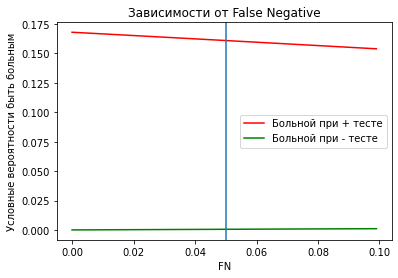

In [3]:
alpha_ = np.arange(0, 0.1, 0.001)

plt.plot(alpha_, func_F(alpha=alpha_), 'r', label='Больной при + тесте')
plt.plot(alpha_, func_G(alpha=alpha_), 'g', label='Больной при - тесте')
plt.axvline(0.05)
plt.title('Зависимости от False Negative')
plt.xlabel('FN')
plt.ylabel('Условные вероятности быть больным')
plt.legend()
plt.show()

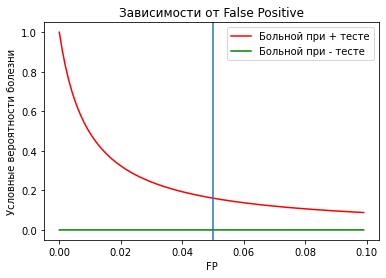

In [4]:
beta_ = np.arange(0, 0.1, 0.001)

plt.plot(beta_, func_F(beta=beta_), 'r', label='Больной при + тесте')
plt.plot(beta_, func_G(beta=beta_), 'g', label='Больной при - тесте')
plt.axvline(0.05)
plt.title('Зависимости от False Positive')
plt.xlabel('FP')
plt.ylabel('Условные вероятности болезни')
plt.legend()
plt.show()

##### Вывод

Как видно из графиков, уменьшение ошибки FN лишь незначительно увеличит вероятность обнаружить больного при + тесте и незначительно снизит вероятность быть больным при - тесте. Уменьшение FP незначительно скажется на вероятности быть больным при - тесте. А вот уменьшение ошибки FP хотя бы до 2% позволит увеличить вероятность быть больным при + тесте в 2 раза, то есть примерно до 32% быть больным при + тесте. Уменьшение же её до 1% позволит говорить о 49%. 

In [5]:
print(f'{func_F(beta=0.02) / func_F(beta=0.05):.2f}, {func_F(beta=0.02):.2f}, '
      f'{func_F(beta=0.01) / func_F(beta=0.05):.2f}, {func_F(beta=0.01):.2f}')

2.01, 0.32, 3.04, 0.49


## Часть II: О линейной регрессии

Эта часть первого домашнего задания связана с анализом конкретного датасета. Датасет давайте возьмём довольно релевантный реальной жизни; он доступен по следующей ссылке:

https://ourworldindata.org/coronavirus-source-data

1. Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.

2. Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

a. Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

b. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

c. Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).

3. Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана:


Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа перед интегралом может быть произвольной (и её можно внести в экспоненту), а в экспоненте под интегралом может быть произвольная квадратичная функция от t.

a. Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.

b. Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.

c. Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?

4. Бонус: проведите такой же анализ для других стран (здесь придётся руками подобрать дни начала моделирования — коронавирус приходил в разные страны в разное время). Насколько разные параметры получаются? Можно ли разделить страны на кластеры (хотя бы чисто визуально) в зависимости от этих параметров?

5. [Эта часть задания не оценивается, здесь нет правильных и неправильных ответов, но буду рад узнать, что вы думаете]
Что вы поняли из этого упражнения? Что можно сказать про коронавирус по итогам такого моделирования? Как принять решение, например, о том, нужно ли вводить карантин?



## 1

In [6]:
all_data = pd.read_csv('covid_data.csv', parse_dates=['date'])
print(all_data.shape)
# all_data.head()

(70444, 59)


In [7]:
DATE_3_MARCH = datetime(2020, 3, 3) 
LAST_DATE = DATE_3_MARCH + timedelta(days=50)

russian_data = all_data[all_data['location'] == 'Russia']
russian_data = russian_data[russian_data['date'] >= DATE_3_MARCH]
russian_data = russian_data[russian_data['date'] < LAST_DATE]
print(russian_data.shape)
# russian_data.head()

(50, 59)


In [8]:
russian_data['new_cases'] = russian_data['new_cases'].apply(lambda x: 1 if x == 0 else x)
russian_data['date'] = russian_data['date'].apply(lambda x: ((x - DATE_3_MARCH)/timedelta(1)))
russian_data['date'] = russian_data['date'].astype(int)
# russian_data.head()

## 2

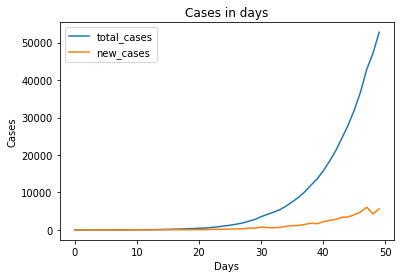

In [9]:
TARGET_VARS = ['total_cases', 'new_cases']

for target in TARGET_VARS:
    plt.plot(russian_data['date'], russian_data[target], label=target)
plt.title('Cases in days')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.legend()
plt.show()

In [10]:
linreg_total = LinearRegression()
linreg_total.fit(np.array(russian_data['date']).reshape(-1, 1), np.log(russian_data['total_cases']))

linreg_new = LinearRegression()
linreg_new.fit(np.array(russian_data['date']).reshape(-1, 1), np.log(russian_data['new_cases']))
coefs = [linreg_total.coef_, linreg_new.coef_]
inters = [linreg_total.intercept_, linreg_new.intercept_]

### 2а. Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

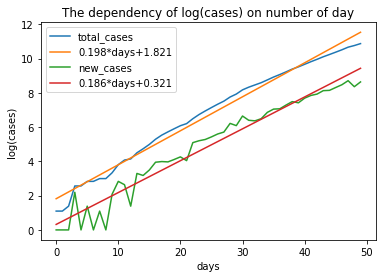

In [11]:
for i, target in enumerate(TARGET_VARS):
    plt.plot(russian_data['date'], np.log(russian_data[target]), label=target)
    plt.plot(russian_data['date'], coefs[i]*russian_data['date']+inters[i], label=f'{coefs[i][0]:.3f}*days+{inters[i]:.3f}')
plt.title('The dependency of log(cases) on number of day')
plt.xlabel('days')
plt.ylabel('log(cases)')
plt.legend()
plt.show()

In [12]:
# Оценим дисперсию 
def count_var(x_real, x_pred):
    summ = 0
    for i in range(x_real.shape[0]):
        summ += (x_real.iat[i] - x_pred.iat[i]) ** 2
    summ /= x_real.shape[0]
    return np.sqrt(summ)

russian_50_days_var = count_var(np.log(russian_data['total_cases']), 
                                linreg_total.coef_*russian_data['date']+linreg_total.intercept_)
russian_50_days_var

0.3490422059635659

### 2b. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

###### Будем работать с total_cases

In [80]:
N = 800
X_MAX = 4
X_MIN = 1
Y_MIN = 0.1
Y_MAX = 0.4
X_add = np.linspace(-X_MAX, X_MAX, N)
X = np.linspace(X_MIN, X_MAX, N)
Y = np.linspace(Y_MIN, Y_MAX, N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def myplot_heatmap(Z):
    '''Из лекции 3 # Make the plot'''
    plt.xlim((X_MIN, X_MAX))
    plt.ylim((Y_MIN, Y_MAX))
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
    plt.scatter(linreg_total.intercept_, linreg_total.coef_, marker='*', s=150)
    
    
def myplot_sample_lines(mu, sigma, n=100, points=None):
    '''Из лекции 3 # Посэмплируем и порисуем прямые'''
    my_w = np.random.multivariate_normal(mu, sigma, n)
    for w in my_w:
        plt.plot(X_add, w[0] + w[1]*X_add, 'k-', lw=.3)
    plt.ylim((-X_MAX, X_MAX))
    plt.xlim((-X_MAX, X_MAX))
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)
    plt.show()

<ipython-input-80-754cb1a1834e>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)


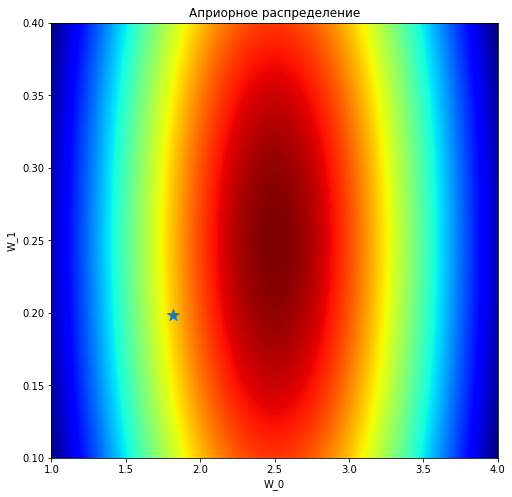

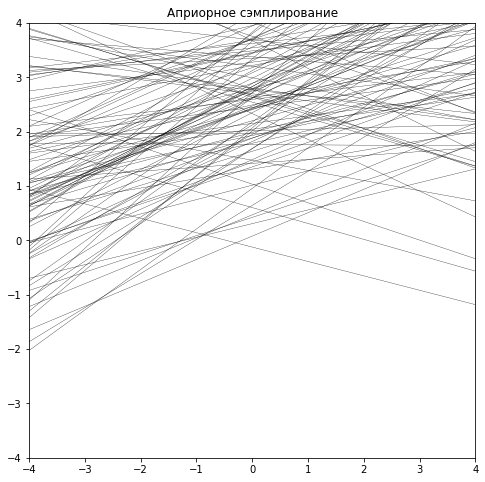

In [81]:
# Построим априорное распределение и сэмплирование
cur_mu, cur_sigma = np.array([(X_MIN+X_MAX)/2, (Y_MIN+Y_MAX)/2]), 2 * np.array([[0.5, 0], [0, 0.05]])

Z = st.multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)

fig = plt.figure(figsize=(8, 8))
plt.xlabel('W_0')
plt.ylabel('W_1')
plt.title('Априорное распределение')
myplot_heatmap(Z)

fig = plt.figure(figsize=(8, 8))
plt.title('Априорное сэмплирование')
myplot_sample_lines(cur_mu, cur_sigma, n=100)

In [82]:
def bayesian_update(mu, sigma, x, y, sigma_noise=russian_50_days_var):
    '''Из лекции 3'''
    x_matrix = np.array([[1, x]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

[1.82386096 0.19819703] 
 [[ 4.70741849e-03 -1.42646896e-04]
 [-1.42646896e-04  5.82941563e-06]]


<ipython-input-80-754cb1a1834e>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)


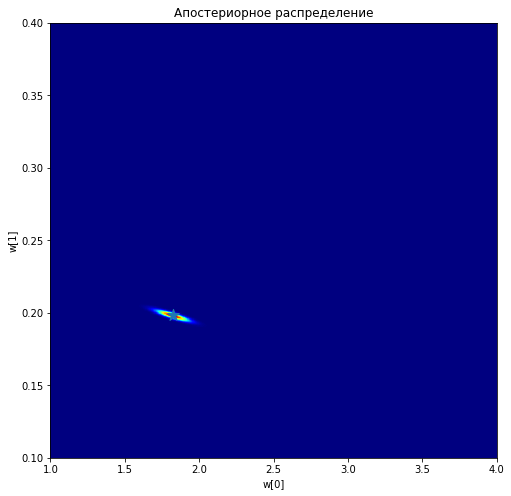

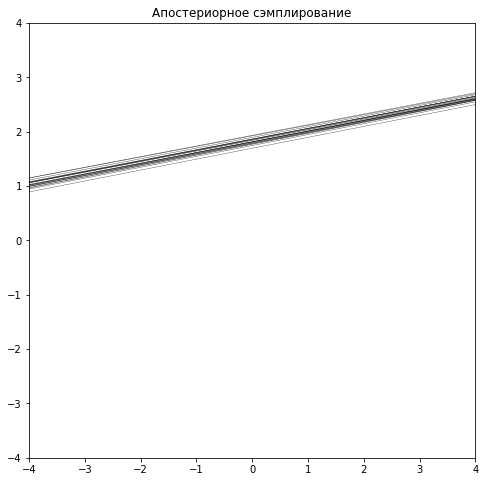

In [84]:
for i in range(50):
    px, py = russian_data['date'].iloc[i], np.log(russian_data['total_cases'].iloc[i])
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, px, py)

print(cur_mu, '\n', cur_sigma)
Z = st.multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma) 
fig = plt.figure(figsize=(8, 8))
plt.title('Апостериорное распределение')
plt.xlabel('w[0]')
plt.ylabel('w[1]')
myplot_heatmap(Z)

fig = plt.figure(figsize=(8,8))
plt.title('Апостериорное сэмплирование')
myplot_sample_lines(cur_mu, cur_sigma, n=20)

### c. Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).

In [96]:
DAY_1_MAY = datetime(2020, 5, 1)
DAY_1_JUNE = datetime(2020, 6, 1)
DAY_1_SEPTEMBER = datetime(2020, 9, 1)
day_1_may_num = (DAY_1_MAY - DATE_3_MARCH).days
day_1_june_num = (DAY_1_JUNE - DATE_3_MARCH).days
day_1_sept_num = (DAY_1_SEPTEMBER - DATE_3_MARCH).days
day_1_may_num, day_1_june_num, day_1_sept_num

(59, 90, 182)

In [117]:
def predict_cases(days_arr, mu, sigma, day_1_may_num, day_1_june_num, day_1_sept_num, n=100, points=None):
    '''Из лекции 3 # Посэмплируем и порисуем прямые'''
    my_w = np.random.multivariate_normal(mu, sigma, n)
    mean_1_may, mean_1_june, mean_1_sept = 0, 0, 0
    for w in my_w:
        plt.plot(days_arr, w[0] + w[1]*days_arr, 'k-', lw=.3)
        mean_1_may += np.exp(w[0] + w[1]*days_arr[day_1_may_num - 1])
        mean_1_june += np.exp(w[0] + w[1]*days_arr[day_1_june_num - 1])
        mean_1_sept += np.exp(w[0] + w[1]*days_arr[day_1_sept_num - 1])
    mean_1_may /= n
    mean_1_june /= n
    mean_1_sept /= n
    plt.show()
    return mean_1_may, mean_1_june, mean_1_sept

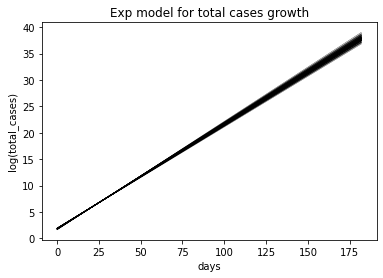

Среднее (по сэмплам) общее количество случаев: 
 к 1 мая -- 6e+05, 
 к 1 июня -- 3e+08,
 к 1 сентября -- 3e+16.


In [124]:
DAYS = np.linspace(0, day_1_sept_num, day_1_sept_num, dtype=int)
plt.title('Exp model for total cases growth')
plt.xlabel('days')
plt.ylabel('log(total_cases)')
mean_1_may, mean_1_june, mean_1_sept = predict_cases(DAYS, cur_mu, cur_sigma, day_1_may_num, day_1_june_num, day_1_sept_num)
print(f'Среднее (по сэмплам) общее количество случаев: \n к 1 мая -- {mean_1_may:.0e}, \n к 1 июня -- {mean_1_june:.0e},\n к 1 сентября -- {mean_1_sept:.0e}.')

## 3

### a. Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.


In [153]:
all_russian_data = all_data[all_data['location'] == 'Russia']
all_russian_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
52105,RUS,Europe,Russia,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52106,RUS,Europe,Russia,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52107,RUS,Europe,Russia,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52108,RUS,Europe,Russia,2020-02-03,2.0,0.0,NaN,NaN,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52109,RUS,Europe,Russia,2020-02-04,2.0,0.0,NaN,NaN,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824


In [154]:
all_russian_data['date'] = all_russian_data['date'].apply(lambda x: ((x - DATE_3_MARCH)/timedelta(1)))
all_russian_data['date'] = all_russian_data['date'].astype(int)
all_russian_data = all_russian_data[all_russian_data['date'] >= 0]
russian_data.head()

<ipython-input-154-489dd1d9b1ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_russian_data['date'] = all_russian_data['date'].apply(lambda x: ((x - DATE_3_MARCH)/timedelta(1)))
<ipython-input-154-489dd1d9b1ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_russian_data['date'] = all_russian_data['date'].astype(int)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
52137,RUS,Europe,Russia,0,3.0,1.0,0.143,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52138,RUS,Europe,Russia,1,3.0,1.0,0.143,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52139,RUS,Europe,Russia,2,4.0,1.0,0.286,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52140,RUS,Europe,Russia,3,13.0,9.0,1.571,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52141,RUS,Europe,Russia,4,13.0,1.0,1.571,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824


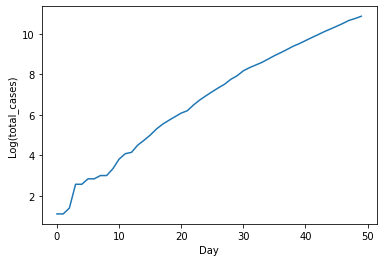

/Users/mikhailgashkov/.venv/lib/python3.8/site-packages/pandas/core/computation/expressions.py:203: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


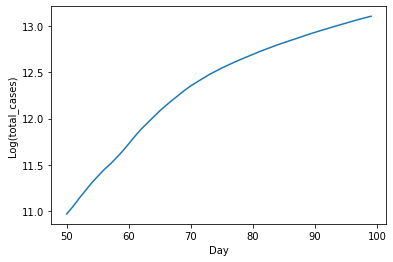

In [206]:
inds = all_russian_data['date'] < 50
plt.plot(all_russian_data[inds]['date'], np.log(all_russian_data[inds]['total_cases']))
plt.xlabel('Day')
plt.ylabel('Log(total_cases)')
plt.show()

inds = (all_russian_data['date'] >= 50) * (all_russian_data['date'] < 100)
plt.plot(all_russian_data[inds]['date'], np.log(all_russian_data[inds]['total_cases']))
plt.xlabel('Day')
plt.ylabel('Log(total_cases)')
plt.show()

Можно попробовать обучить вторую гауссоиду для последующих 50 дней (то есть в период с 50-го по 100-ый день, начиная с 03 марта). 

### b. Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.



In [228]:
inds = (all_russian_data['date'] >= 50) * (all_russian_data['date'] < 100)
dates_part_3 = np.vstack(all_russian_data[inds]['date'], all_russian_data[inds]['date'] ** 2)
dates_part_3 = all_russian_data[inds]['date'] ** 2
cases_part_3 = all_russian_data[inds]['total_cases']

/Users/mikhailgashkov/.venv/lib/python3.8/site-packages/pandas/core/computation/expressions.py:203: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


TypeError: _vhstack_dispatcher() takes 1 positional argument but 2 were given

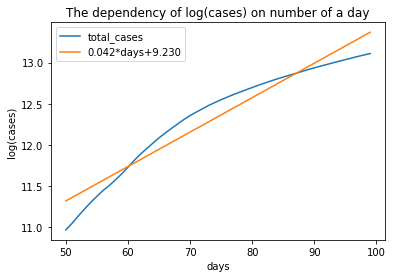

8.062231477088721

In [217]:
linreg_total_part_3 = LinearRegression()
linreg_total_part_3.fit([np.array(dates_part_3)], np.log(cases_part_3))
plt.plot(dates_part_3, 
         np.log(cases_part_3), 
         label='total_cases')
plt.plot(dates_part_3, 
         linreg_total_part_3.intercept_+linreg_total_part_3.coef_*dates_part_3, 
         label=f'{(linreg_total_part_3.coef_)[0]:.3f}*days+{(linreg_total_part_3.intercept_):.3f}')
plt.title('The dependency of log(cases) on number of a day')
plt.xlabel('days')
plt.ylabel('log(cases)')
plt.legend()
plt.show()

russian_50_100_days_var = count_var(np.log(dates_part_3), 
                                linreg_total_part_3.coef_*dates_part_3+linreg_total_part_3.intercept_)
russian_50_100_days_var

In [210]:
N = 800
X_MAX = 10
X_MIN = 6
Y_MIN = -0.4
Y_MAX = 0.4
X_add = np.linspace(-X_MAX, X_MAX, N)
X = np.linspace(X_MIN, X_MAX, N)
Y = np.linspace(Y_MIN, Y_MAX, N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y


def myplot_heatmap(Z):
    '''Из лекции 3 # Make the plot'''
    plt.xlim((X_MIN, X_MAX))
    plt.ylim((Y_MIN, Y_MAX))
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
    plt.scatter(linreg_total_part_3.intercept_, linreg_total_part_3.coef_, marker='*', s=150)
    
    
def myplot_sample_lines(mu, sigma, n=100):
    '''Из лекции 3 # Посэмплируем и порисуем прямые'''
    my_w = np.random.multivariate_normal(mu, sigma, n)
    for w in my_w:
        plt.plot(X_add, w[0] + w[1]*X_add, 'k-', lw=.3)
    plt.ylim((-X_MAX, X_MAX))
    plt.xlim((-X_MAX, X_MAX))
    plt.show()

<ipython-input-210-17d3eeb8e190>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)


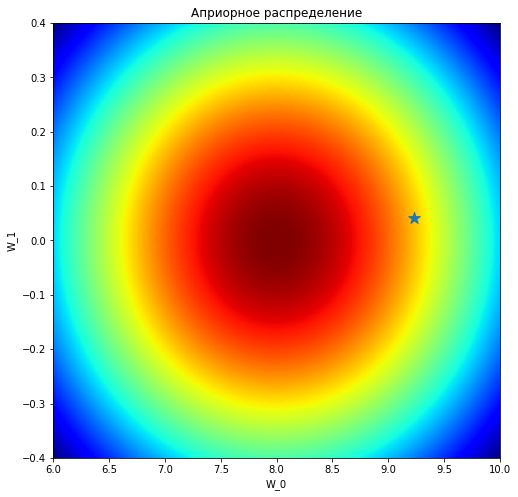

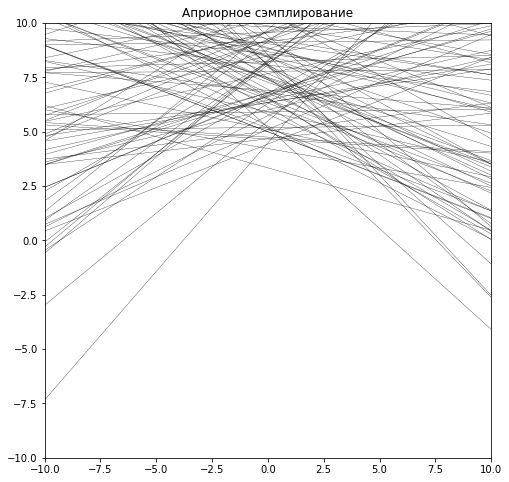

In [224]:
# Построим априорное распределение и сэмплирование
cur_mu, cur_sigma = np.array([(X_MIN+X_MAX)/2, (Y_MIN+Y_MAX)/2]), 2 * np.array([[2, 0], [0, 0.1]])

Z = st.multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)

fig = plt.figure(figsize=(8, 8))
plt.xlabel('W_0')
plt.ylabel('W_1')
plt.title('Априорное распределение')
myplot_heatmap(Z)

fig = plt.figure(figsize=(8, 8))
plt.title('Априорное сэмплирование')
myplot_sample_lines(cur_mu, cur_sigma, n=100)

In [222]:
def get_likelihood(px, py, sigma=russian_50_100_days_var):
    return lambda w : np.exp(-(w[0] + w[1]*px - py) ** 2) / (2 * sigma * np.sqrt(2 * np.pi))


def get_aposterior(cur_likelihood, Z, pos):
    Z = np.array([[cur_likelihood(pos[i, j]) * Z[i, j] for j in range(pos.shape[1])] for i in range(pos.shape[0])])
    return Z

<ipython-input-210-17d3eeb8e190>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)


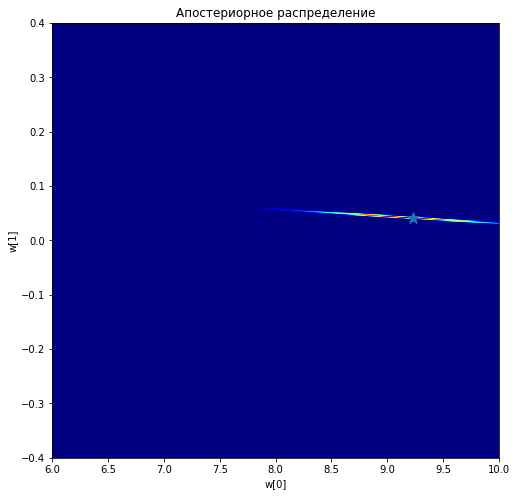

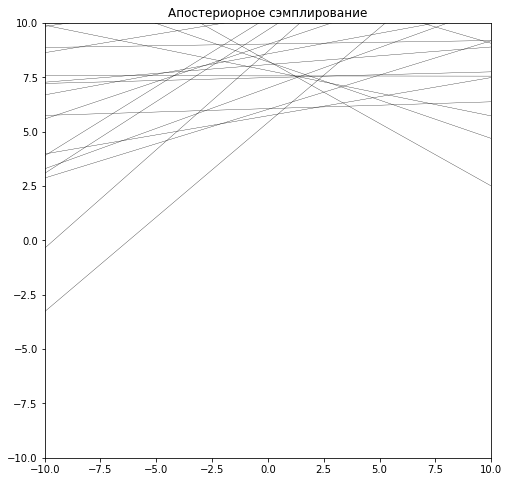

In [225]:
for i in range(50):
    px, py = dates_part_3.iloc[i], np.log(cases_part_3.iloc[i])
    cur_likelihood = get_likelihood(px, py)
    Z = get_aposterior(cur_likelihood, Z, pos)

# print(cur_mu, '\n', cur_sigma)
fig = plt.figure(figsize=(8, 8))
plt.title('Апостериорное распределение')
plt.xlabel('w[0]')
plt.ylabel('w[1]')
myplot_heatmap(Z)

fig = plt.figure(figsize=(8,8))
plt.title('Апостериорное сэмплирование')
myplot_sample_lines(cur_mu, cur_sigma, n=20)

### c. Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?

